# モデルの訓練と保存
Google Colaboratoryで画像識別用のモデルを構築し、訓練します。  
今回は、cifar-10を訓練データに使います。  
訓練済みのモデルは保存し、ダウンロードします。

## バージョンの確認
念のために、以下のコードによりtensorflowとKerasのバージョンを確認しておきましょう。

In [1]:
!pip install keras==2.4.3  # anaconda側の設定に合わせるために必要
!pip install tensorflow==2.4.1

     |████████████████████████████████| 394.3 MB 14 kB/s 
     |████████████████████████████████| 2.9 MB 44.5 MB/s 
     |████████████████████████████████| 462 kB 47.0 MB/s 
     |████████████████████████████████| 3.8 MB 40.2 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.

In [1]:
import tensorflow
import keras
print(tensorflow.__version__)
print(keras.__version__)

2.5.0
2.5.0


In [3]:
! python -V

Python 3.7.11


In [ ]:
import tensorflow
import keras

## 訓練データの読み込み
cifar-10を読み込みます。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

(x_train, t_train), (x_test, t_test) = cifar10.load_data()

AttributeError: ignored

## モデルの構築
CNNのモデルを構築します。

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

from keras.utils import np_utils

batch_size = 32
epochs = 20
n_class = 10

t_train = np_utils.to_categorical(t_train, n_class)  # one-hot表現に
t_test = np_utils.to_categorical(t_test, n_class)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=x_train.shape[1:]))  # ゼロパディング、バッチサイズ以外の画像の形状を指定
model.add(Activation("relu"))
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # 一次元の配列に変換
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))  # ドロップアウト
model.add(Dense(n_class))
model.add(Activation("softmax"))

model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 15, 15, 64)        0

## 学習
モデルを訓練します。  
ImageDataGeneratorを使用する際は、学習にfit_generatorメソッドを使います。  
学習には時間がかかりますので、編集→ノートブックの設定のハードウェアアクセラレーターでGPUを選択しましょう。

In [ ]:
x_train = x_train / 255  # 0から1の範囲に収める
x_test = x_test / 255

generator = ImageDataGenerator(
           rotation_range=0.2,
           width_shift_range=0.2,
           height_shift_range=0.2,
           shear_range=10,
           zoom_range=0.2,
           horizontal_flip=True)
generator.fit(x_train)

history = model.fit_generator(generator.flow(x_train, t_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(x_test, t_test))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1563/1563 [==============================] - 74s 20ms/step - loss: 1.9406 - accuracy: 0.2726 - val_loss: 1.4299 - val_accuracy: 0.4775
Epoch 2/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4772 - accuracy: 0.4627 - val_loss: 1.2117 - val_accuracy: 0.5672
Epoch 3/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3348 - accuracy: 0.5222 - val_loss: 1.0698 - val_accuracy: 0.6186
Epoch 4/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2301 - accuracy: 0.5609 - val_loss: 1.0494 - val_accuracy: 0.6354
Epoch 5/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1671 - accuracy: 0.5878 - val_loss: 0.9486 - val_accuracy: 0.6662
Epoch 6/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1023 - accuracy: 0.6118 - val_loss: 0.8779 - val_accuracy: 0.6973
Epoch 7/20
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0840 - accuracy: 0.6223 - val_loss: 0.9044 -

## 学習の推移
学習の推移を表示します。  

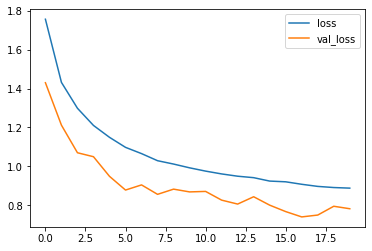

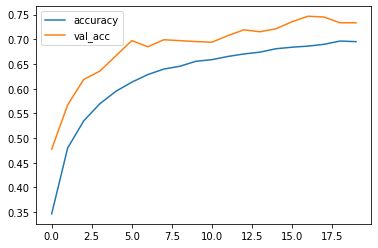

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history["loss"]  # 訓練用データの誤差
train_acc = history.history["accuracy"]  # 訓練用データの精度
val_loss = history.history["val_loss"]  # 検証用データの誤差
val_acc = history.history["val_accuracy"]  # 検証用データの精度

plt.plot(np.arange(len(train_loss)), train_loss, label="loss")
plt.plot(np.arange(len(val_loss)), val_loss, label="val_loss")
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label="accuracy")
plt.plot(np.arange(len(val_acc)), val_acc, label="val_acc")
plt.legend()
plt.show()

## 評価
モデルの評価を行います。  

In [ ]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.7819 - accuracy: 0.7334
0.7818939685821533 0.7333999872207642


## モデルの保存とダウンロード
他の環境でも使えるように、モデルを保存しダウンロードします。

In [ ]:
from google.colab import files

model.save("image_classifier.h5",  include_optimizer=False)
files.download("image_classifier.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

.h5の拡張子を持つモデルのファイルが、ローカルに保存されました。